In [141]:
%matplotlib inline 
import os 
import seaborn as sns
import pandas as pd 
pd.options.display.max_rows=999

afs_lemon       = '/a/projects/nro109_lemon/probands/'   
afs_controls_a  = '/a/projects/nmr093a/probands'
afs_patients_a  = '/a/projects/nmr093a/patients'

phenotypic_dir = '/scr/malta3/workspace/project_iron/phenotypic'

lemon_population =[
'LEMON891/LEMON113', 'LEMON891/LEMON116', 'LEMON891/LEMON117', 'LEMON891/LEMON118', 'LEMON892/LEMON119', 'LEMON892/LEMON120',
'LEMON892/LEMON121', 'LEMON892/LEMON122', 'LEMON892/LEMON123', 'LEMON892/LEMON124', 'LEMON893/LEMON125', 'LEMON893/LEMON126',
'LEMON893/LEMON127', 'LEMON893/LEMON128', 'LEMON893/LEMON129', 'LEMON893/LEMON130', 'LEMON894/LEMON131', 'LEMON894/LEMON132',
'LEMON894/LEMON133', 'LEMON894/LEMON134', 'LEMON894/LEMON135', 'LEMON894/LEMON136', 'LEMON895/LEMON137', 'LEMON895/LEMON138',
'LEMON895/LEMON139', 'LEMON895/LEMON140', 'LEMON895/LEMON141', 'LEMON895/LEMON142', 'LEMON896/LEMON143', 'LEMON896/LEMON144',
'LEMON896/LEMON145', 'LEMON896/LEMON146', 'LEMON896/LEMON147', 'LEMON896/LEMON148', 'LEMON897/LEMON149', 'LEMON897/LEMON150',
'LEMON897/LEMON151', 'LEMON897/LEMON152', 'LEMON897/LEMON153', 'LEMON897/LEMON154', 'LEMON898/LEMON155', 'LEMON898/LEMON156',
'LEMON898/LEMON157', 'LEMON898/LEMON158', 'LEMON898/LEMON160', 'LEMON899/LEMON162', 'LEMON899/LEMON163', 'LEMON899/LEMON164',
'LEMON899/LEMON165', 'LEMON899/LEMON166', 'LEMON899/LEMON161', 'LEMON900/LEMON167', 'LEMON900/LEMON168', 'LEMON900/LEMON169',
'LEMON900/LEMON170', 'LEMON900/LEMON171', 'LEMON901/LEMON174', 'LEMON901/LEMON175', 'LEMON901/LEMON176', 'LEMON901/LEMON177',
'LEMON901/LEMON178', 'LEMON901/LEMON179', 'LEMON901/LEMON229', 'LEMON902/LEMON180', 'LEMON902/LEMON181', 'LEMON902/LEMON182',
'LEMON902/LEMON183', 'LEMON902/LEMON184', 'LEMON902/LEMON185', 'LEMON903/LEMON186', 'LEMON903/LEMON187', 'LEMON903/LEMON188',
'LEMON903/LEMON189', 'LEMON903/LEMON190', 'LEMON903/LEMON191', 'LEMON904/LEMON193', 'LEMON904/LEMON194', 'LEMON904/LEMON195',
'LEMON904/LEMON196', 'LEMON904/LEMON197', 'LEMON905/LEMON198', 'LEMON905/LEMON199', 'LEMON905/LEMON200', 'LEMON905/LEMON201',
'LEMON905/LEMON202', 'LEMON905/LEMON203', 'LEMON906/LEMON205', 'LEMON906/LEMON206', 'LEMON906/LEMON207', 'LEMON906/LEMON208',
'LEMON906/LEMON209', 'LEMON907/LEMON210', 'LEMON907/LEMON211', 'LEMON907/LEMON212', 'LEMON907/LEMON213', 'LEMON907/LEMON214',
'LEMON907/LEMON215', 'LEMON908/LEMON216', 'LEMON908/LEMON217', 'LEMON908/LEMON218', 'LEMON908/LEMON219', 'LEMON908/LEMON220',
'LEMON908/LEMON221', 'LEMON909/LEMON222', 'LEMON909/LEMON223', 'LEMON909/LEMON224',                      'LEMON909/LEMON226',
'LEMON909/LEMON227', 'LEMON909/LEMON228',
 ]

GTS_CONTROLS = ['EC9T', 'GSAT', 'GSNT', 'HM1X', 'HM2X', 'KO4T', 'LL5T', 'LMIT', 'MJBT', 'PAHT', 
                'PU2T', 'RA7T', 'RJJT', 'RMNT', 'SC1T', 'SDCT', 'SMVX', 'SS1X', 'STQT', 'TJ5T', 
                'TR4T', 'TV1T', 'WSKT', 'FA2T', 'GHAT', 'BH5T'] # FIX ===  # N = 26

GTS_PATIENTS = ['AA8P', 'BATP', 'BE9P', 'CB4P', 'CF1P', 'CM5P', 'DF2P', 'HHQP', 'HJEP', 'HSPP',
                  'KDDP', 'LA9P', 'LT5P', 'NL2P', 'NT6P', 'PC5P', 'RA9P', 'RL7P', 'RMJP', 'SA5U',
                  'SBQP', 'SGKP', 'SM6U', 'STDP', 'SULP', 'THCP', 'TT3P', 'YU1P'] 
                  #  N = 28
                  #  N = 28 + 3 ... FL3P,TSEP, have no baseline scans..

In [142]:
def extract_demographics(population, afs_dir, phenotypic_dir, popname):
    import os 
    import pandas as pd 
    import dicom as pydcm 
    
    df_all = []
    for subject_id in population:
        
        if popname == 'GTS':
            subject = subject_id
            dicom_dir = os.path.join(afs_dir, subject_id, 'DICOM')
        elif popname == 'LEMON':
            subject = subject_id[9:]
            dicom_dir = os.path.join(afs_dir, subject_id, 'MRI', 'DICOMS', 't1')
        
        df = pd.DataFrame(index=['%s'%subject], columns= ['Age', 'Gender'])
        dcm       = os.path.join(dicom_dir, os.listdir(dicom_dir)[0])
        reader = pydcm.read_file(dcm)
        
        age =  reader.PatientAge[:-1]
        
        if reader.PatientSex is 'F':
            sex = 'F'
        elif reader.PatientSex is 'M':
            sex = 'M'
    
        df['Age'] = int(age) 
        df['Gender'] = sex 
        
        df_all.append(df)
    
    df_concat = pd.concat(df_all, axis = 0) 
    
    df_concat.to_csv(os.path.join(phenotypic_dir, 'lemon.csv'))
    return df_concat 
    

In [143]:
lemon_controls = extract_demographics(lemon_population, afs_lemon, phenotypic_dir, 'LEMON')
gts_controls   = extract_demographics(GTS_CONTROLS, afs_controls_a, phenotypic_dir, 'GTS')
patients       = extract_demographics(GTS_PATIENTS, afs_patients_a, phenotypic_dir, 'GTS')
#patients = pd.read_csv(os.path.join(phenotypic_dir, 'qsm_patients.csv'),index_col = 0)
#controls = pd.read_csv(os.path.join(phenotypic_dir, 'qsm_controls.csv'),index_col = 0)

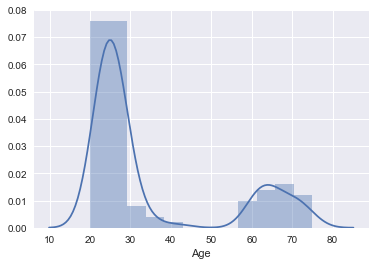

In [144]:
sns.distplot(lemon_controls.Age)

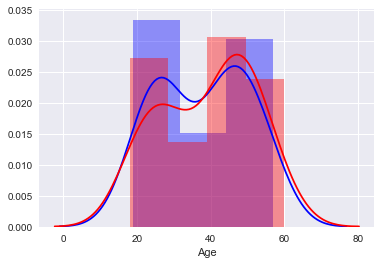

In [145]:
sns.distplot(gts_controls.Age, color='blue')
sns.distplot(patients.Age, color='red')

In [146]:
cols = [col for col in patients.columns if col not in ['Age', 'Gender']]
print patients.drop(cols, axis =1).sort_values('Age')

      Age Gender
BE9P   18      M
HJEP   21      M
BATP   22      M
LA9P   22      M
RMJP   22      F
LT5P   27      M
CM5P   27      M
CF1P   28      M
SM6U   29      M
RL7P   30      F
SGKP   36      F
HHQP   36      M
SA5U   41      M
THCP   42      M
STDP   44      M
PC5P   45      F
TT3P   46      M
NT6P   46      M
SBQP   46      M
CB4P   47      M
YU1P   48      M
RA9P   50      M
SULP   51      M
HSPP   52      F
KDDP   53      M
NL2P   54      M
DF2P   56      M
AA8P   60      M


In [170]:
#print lemon_controls.sort_values('Age')

#BE9P   18      M    SMVX       19      M   LEMON141   20      M 
#HJEP   21      M    LEMON129   21      M   LEMON179   21      M
#BATP   22      M    HM1X       23      M   LEMON210   22      M  LEMON220   22      M  LEMON185   22      M LEMON183   22      M
#LA9P   22      M    STQT       23      M   LEMON133   23      M  LEMON188   23      M
#RMJP   22      F    SS1X       22      F   TR4T       24      F  LEMON148   22      F  LEMON140   21      F  
#LT5P   27      M    FA2T       27      M   LEMON198   27      M  LEMON177   27      M  LEMON196   27      M LEMON216   27      M 
#CM5P   27      M    LEMON213   26      M   LEMON119   27      M  LEMON209   27      M  LEMON194   27      M LEMON182   27      M
#CF1P   28      F    WSKT       26      F   SC1T       27      F  LEMON123   29      F
#SM6U   29      M    PAHT       29      M   LEMON174   29      M  LEMON178   29      M  LEMON176   29      M
#RL7P   30      F    GSNT       29      F   LEMON123   29      F
#SGKP   36      F    RJJT       35      F   LEMON149   35      F
#HHQP   36      M    LEMON120   35      M   LEMON223   31      M
#SA5U   41      M    KO4T       41      M
#THCP   42      M    HM2X       42      M  
#STDP   44      M    MJBT       44      M   
#PC5P   45      F    SDCT       42      F   LEMON117   42      F
#TT3P   46      M    EC9T       46      M
#NT6P   46      M    GHAT       46      M 
#SBQP   46      M    RA7T       46      M
#CB4P   47      M    PU2T       47      M
#YU1P   48      M    TJ5T       49      M
#RA9P   50      M    BH5T       50      M
#SULP   51      M    LMIT       53      M 
#HSPP   52      F    GSAT       54      F
#KDDP   53      M    TV1T       55      M
#NL2P   54      M    RMNT       57      M  LEMON168   61      M   
#DF2P   56      M    LEMON124   61      M  LEMON126   62      M
#AA8P   60      M    

lemon_matches = [
    'LEMON141', 
    'LEMON129', 'LEMON179', 
    'LEMON210', 'LEMON220', #'LEMON185', #'LEMON183', 
    'LEMON133', 'LEMON188', 
    'LEMON148', 'LEMON140', 
    'LEMON198', 'LEMON177', #'LEMON196', #'LEMON216', 
    'LEMON213', 'LEMON119', #'LEMON209', #'LEMON194', 'LEMON182',
    'LEMON123', 
    'LEMON174', 'LEMON178', 'LEMON176',
    'LEMON123', 
    'LEMON149', 
    'LEMON120', 'LEMON223', 
    'LEMON117'
    'LEMON168', 
    'LEMON124', 'LEMON126'
 ]
print len(lemon_matches) + len(gts_controls)
print len(patients)

50
28


In [171]:
cols = [col for col in gts_controls.columns if col not in ['Age', 'Gender']]
print gts_controls.drop(cols, axis =1).sort_values('Age')

      Age Gender
SMVX   19      M
SS1X   22      F
HM1X   23      M
STQT   23      M
TR4T   24      F
WSKT   26      F
FA2T   27      M
SC1T   27      F
GSNT   29      F
PAHT   29      M
LL5T   30      F
RJJT   35      F
KO4T   41      M
HM2X   42      M
SDCT   42      F
MJBT   44      M
EC9T   46      M
GHAT   46      M
RA7T   46      M
PU2T   47      M
TJ5T   49      M
BH5T   50      M
LMIT   53      M
GSAT   54      F
TV1T   55      M
RMNT   57      M


In [155]:
lemon_old   =  [subject for subject in df_concat.index if df_concat.loc[subject]['Age'] > 50]
lemon_young =  [subject for subject in df_concat.index if df_concat.loc[subject]['Age'] < 25]


print 'LEMON_OLD',   len(lemon_old)
print 'LEMON_YOUNG', len(lemon_young)



LEMON_OLD 26
LEMON_YOUNG 38
